In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


## Explore and Clean the Data

### Import the data

In [3]:
customer_info = pd.read_excel('data/Bank_Churn_Messy.xlsx', sheet_name='Customer_Info')
account_info = pd.read_excel('data/Bank_Churn_Messy.xlsx', sheet_name='Account_Info')

In [4]:
customer_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [5]:
account_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


### Join "Account_Info" to "Customer_Info"

In [6]:
customers = customer_info.merge(
    account_info,
    how="left",
    on="CustomerId"
)

### Removing duplicates

In [7]:
customers.duplicated().any()

np.True_

In [8]:
customers[customers.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [9]:
customers = customers.drop_duplicates().reset_index(drop=True)

In [10]:
customers.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0


### Check the data types for each column and make any necessary fixes

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure_x         10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  Tenure_y         10000 non-null  int64  
 12  IsActiveMember   10000 non-null  object 
 13  Exited           10000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [12]:
customers.Age = customers.Age.round().astype('Int64')

customers.EstimatedSalary = customers.EstimatedSalary.str.strip().str.strip('€')
customers.EstimatedSalary = pd.to_numeric(customers.EstimatedSalary,errors="coerce")

customers.Balance = customers.Balance.str.strip().str.strip('€')
customers.Balance = pd.to_numeric(customers.Balance,errors="coerce")

In [13]:
customers.HasCrCard = customers.HasCrCard.str.lower().str.replace('yes','1').str.replace('no','0')
customers.HasCrCard = pd.to_numeric(customers.HasCrCard, errors="coerce")
customers.HasCrCard = customers.HasCrCard.astype(bool)

In [14]:
customers.IsActiveMember = customers.IsActiveMember.str.lower().str.replace('yes','1').str.replace('no','0')
customers.IsActiveMember = pd.to_numeric(customers.IsActiveMember, errors="coerce")
customers.IsActiveMember = customers.IsActiveMember.astype(bool)

In [15]:
customers.Exited = customers.Exited.astype(bool)

In [16]:
customers.CustomerId = customers.CustomerId.astype(str)

### Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median

In [17]:
customers.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    3
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [18]:
customers.Surname = np.where(customers.Surname.isna(),'MISSING',customers.Surname)

In [19]:
customers.Age = np.where(customers.Age.isna(),customers.Age.median(),customers.Age)

In [20]:
customers.EstimatedSalary = np.where(customers.EstimatedSalary.isna(),customers.EstimatedSalary.median(),customers.EstimatedSalary)

### Check the numeric columns in the data

In [21]:
num_cols = customers.select_dtypes(include="number").columns
print(num_cols)

Index(['CreditScore', 'Age', 'Tenure_x', 'EstimatedSalary', 'Balance',
       'NumOfProducts', 'Tenure_y'],
      dtype='object')


In [22]:
profile = customers[num_cols].describe()
print(profile)

        CreditScore           Age      Tenure_x  EstimatedSalary  \
count  10000.000000  10000.000000  10000.000000     10000.000000   
mean     650.528800     38.921500      5.012800    100092.265795   
std       96.653299     10.487552      2.892174     57510.146430   
min      350.000000     18.000000      0.000000        11.580000   
25%      584.000000     32.000000      3.000000     51002.110000   
50%      652.000000     37.000000      5.000000    100236.020000   
75%      718.000000     44.000000      7.000000    149388.247500   
max      850.000000     92.000000     10.000000    199992.480000   

             Balance  NumOfProducts      Tenure_y  
count   10000.000000   10000.000000  10000.000000  
mean    76485.889288       1.530200      5.012800  
std     62397.405202       0.581654      2.892174  
min         0.000000       1.000000      0.000000  
25%         0.000000       1.000000      3.000000  
50%     97198.540000       1.000000      5.000000  
75%    127644.240000   

In [23]:
customers[customers.EstimatedSalary < 0]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited


In [24]:
def iqr_outliers(column, factor=1.5):
    """
    Return a boolean mask where True = outlier based on IQR rule.

    column: pandas Series (numeric column)
    factor: multiplier on IQR (default 1.5)
    """
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - factor * iqr
    upper = q3 + factor * iqr

    # True for values below lower or above upper
    return (column < lower) | (column > upper)

In [25]:
iqr_outliers(customers.CreditScore).sum()
# TODO: what to make with credit score outliers? Are they valid or not?

np.int64(15)

### Check countries name

In [26]:
customers.Geography.value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [27]:
customers.Geography = customers.Geography.str.replace('French','France').str.replace('FRA','France')

In [28]:
customers.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

### Correlation Heatmap

<Axes: >

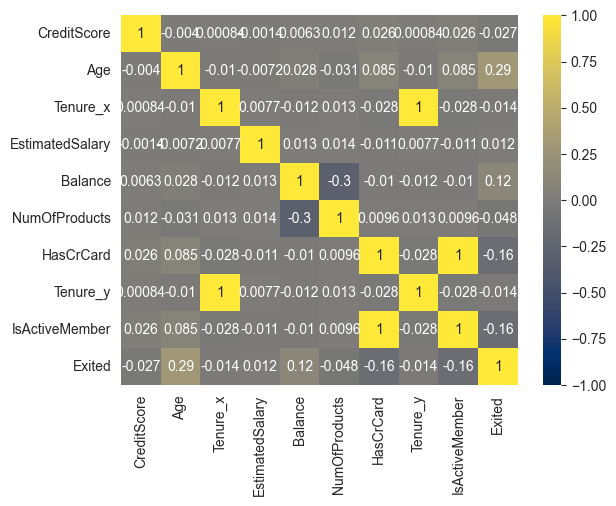

In [29]:
sns.heatmap(customers.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="cividis")

Tenure_x and Tenure_y have correlation coefficient of 1. For using in modeling it's important to remove one feature.

HasCrCard and isActiveMember are heavily correlated as well. HasCrCard feature needs to be removed.

The biggest negative correlation (-0.3) is between "NumOfProducts" and "Balance"

The biggest positive correlation (0.29) is between "Age" and "Exited"

### A bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)

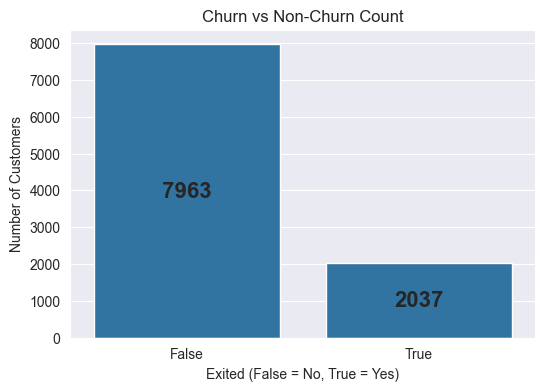

In [30]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=customers, x="Exited")

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container,
                label_type="center",
                fontsize=16,
                fontweight="bold")

plt.title("Churn vs Non-Churn Count")
plt.xlabel("Exited (False = No, True = Yes)")
plt.ylabel("Number of Customers")

plt.show()

In [31]:
print(customers["Exited"].value_counts())

Exited
False    7963
True     2037
Name: count, dtype: int64


### Explore the categorical variables vs. the target, and percentage of Churners by “Geography” and “Gender”

#### Churn Rate by Geography

In [32]:
churn_by_geo = (
    customers
    .groupby("Geography")["Exited"]
    .mean()              # average of 0/1 = churn rate
    .mul(100)            # turn into %
    .round(2)
    .reset_index(name="ChurnRatePercent")
)

print(churn_by_geo)

  Geography  ChurnRatePercent
0    France             16.15
1   Germany             32.44
2     Spain             16.67


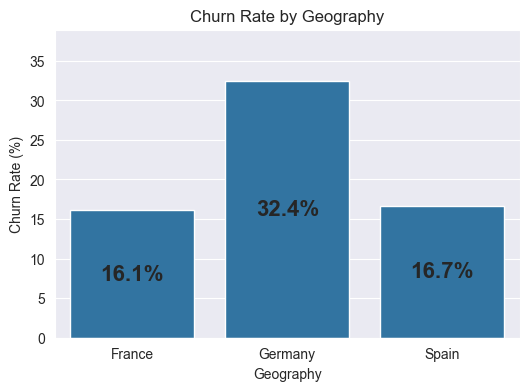

In [33]:
# Churn rate by Geo Barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=churn_by_geo,
    x="Geography",
    y="ChurnRatePercent"
)

for container in ax.containers:
    ax.bar_label(
        container,
        label_type="center",
        fmt="%.1f%%",
        fontsize=16,
        fontweight="bold"
    )

plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Geography")
plt.ylim(0, churn_by_geo["ChurnRatePercent"].max() * 1.2)

plt.show()

#### Churn Rate by Gender

In [34]:
churn_by_gender = (
    customers
    .groupby("Gender")["Exited"]
    .mean()
    .mul(100)
    .round(2)
    .reset_index(name="ChurnRatePercent")
)

print(churn_by_gender)

   Gender  ChurnRatePercent
0  Female             25.07
1    Male             16.46


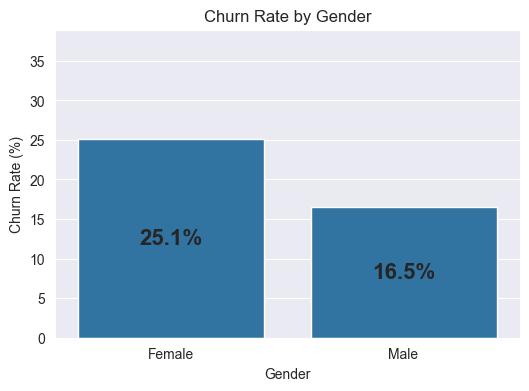

In [35]:
# Churn rate by Gender Barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=churn_by_gender,
    x="Gender",
    y="ChurnRatePercent"
)

for container in ax.containers:
    ax.bar_label(
        container,
        label_type="center",
        fmt="%.1f%%",             # format as percentage, e.g. 23.4%
        fontsize=16,
        fontweight="bold"
    )

plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Gender")
plt.ylim(0, churn_by_geo["ChurnRatePercent"].max() * 1.2)

plt.show()

### Box plots for each numeric field, broken out by churners vs. non-churners

['CreditScore', 'Age', 'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'Tenure_y']


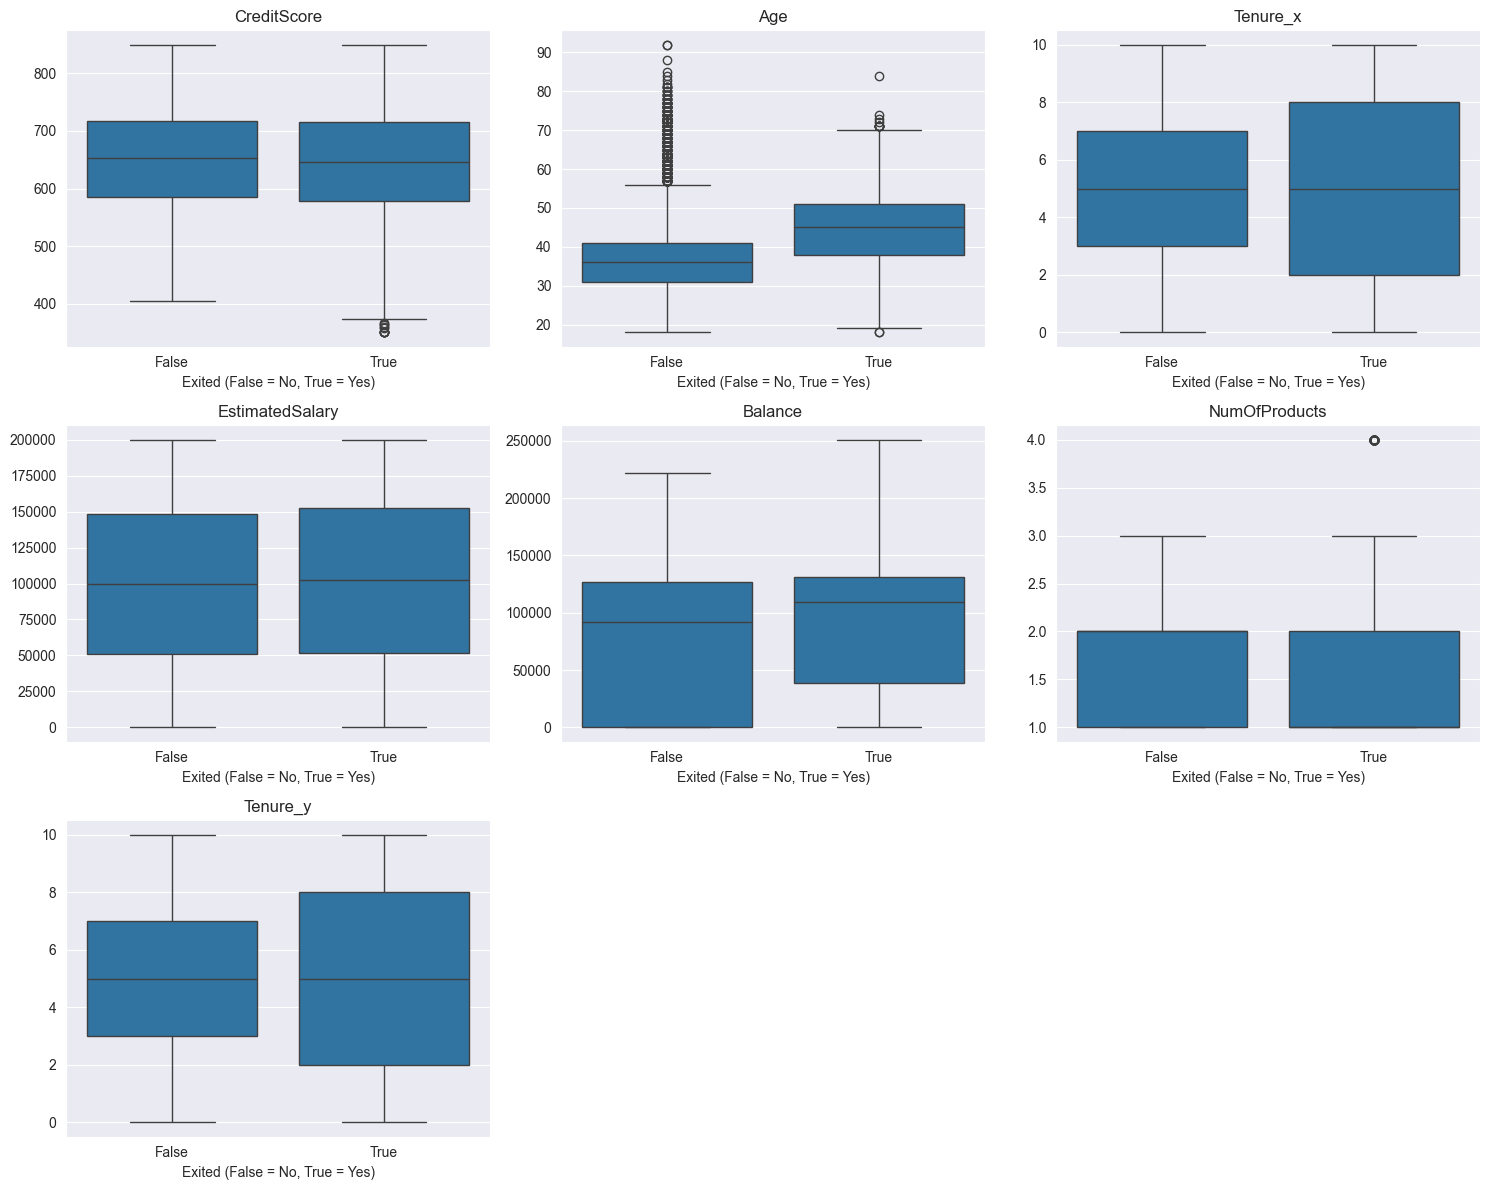

In [36]:
# 1. Get numeric columns except the target
num_cols = customers.select_dtypes(include="number").columns
num_cols = [c for c in num_cols if c != "Exited"]
print(num_cols)   # should show 7 columns

# 2. Set up a 3x3 grid (for 7 columns)
n = len(num_cols)     # 7
ncols = 3
nrows = math.ceil(n / ncols)   # -> 3

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), squeeze=False)

for i, col in enumerate(num_cols):
    r = i // ncols
    c = i % ncols
    ax = axes[r][c]

    sns.boxplot(
        data=customers,
        x="Exited",      # churn vs non-churn
        y=col,
        ax=ax
    )

    ax.set_title(col)
    ax.set_xlabel("Exited (False = No, True = Yes)")
    ax.set_ylabel("")

# 3. Hide any unused subplot cells (there will be 2 empty)
for j in range(i + 1, nrows * ncols):
    r = j // ncols
    c = j % ncols
    fig.delaxes(axes[r][c])

plt.tight_layout()
plt.show()

### A new "balance_v_income" feature

In [37]:
# Work on a clean copy to avoid chained assignment issues
customers = customers.copy()

# Create the new feature
customers["balance_v_income"] = customers["Balance"] / customers["EstimatedSalary"]

# Replace +/- inf with NaN
customers["balance_v_income"] = customers["balance_v_income"].replace(
    [np.inf, -np.inf], np.nan
)

# Drop rows where balance_v_income or Exited is missing (for plotting)
plot_df = customers.dropna(subset=["balance_v_income", "Exited"]).copy()

# Check outliers
customers["balance_v_income"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

lower = 0
upper = customers["balance_v_income"].quantile(0.99)

# True where value is an outlier
outlier_mask = (customers["balance_v_income"] < lower) | (customers["balance_v_income"] > upper)

outlier_mask.sum()   # how many outliers

np.int64(100)

In [38]:
# Remove outliers
customers["balance_v_income"] = customers["balance_v_income"].clip(lower=lower, upper=upper)
# New statistic
customers["balance_v_income"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    10000.000000
mean         1.865448
std          4.669869
min          0.000000
50%          0.747002
75%          1.514022
90%          3.674504
95%          7.249500
99%         35.484626
max         35.484709
Name: balance_v_income, dtype: float64

### Visualize balance_v_income vs. churn status

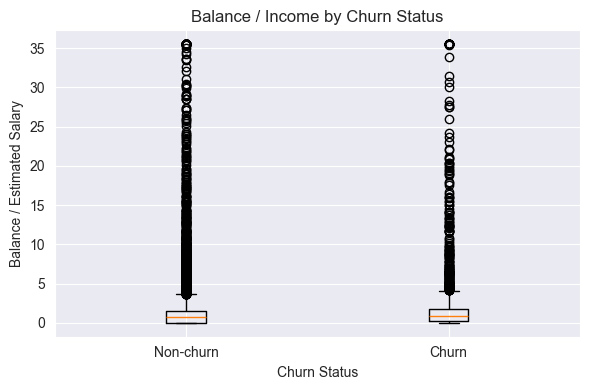

In [39]:
non_churn = customers.loc[customers["Exited"] == 0, "balance_v_income"].dropna()
churn = customers.loc[customers["Exited"] == 1, "balance_v_income"].dropna()

plt.figure(figsize=(6, 4))

plt.boxplot(
    [non_churn, churn],
    positions=[1, 2],                     # 2 groups → 2 positions
    tick_labels=["Non-churn", "Churn"]
)
plt.title("Balance / Income by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Balance / Estimated Salary")
plt.tight_layout()
plt.show()



### Explanation
 - Most points are very close to 0–1 (small ratio of balance to income).
 - There’s a long right tail where people have much higher balance relative to income.
 - Both churners and non-churners show the same basic pattern; there're churners with a slightly higher median / spread, but it’s not a big difference.

The engineered feature balance_v_income (Balance / EstimatedSalary) is highly right-skewed, with many customers near zero and a long tail of high ratios. Boxplots by churn status show broadly similar distributions between churners and non-churners, with churners having a slightly higher median ratio. This suggests that balance relative to income may have some but not a dominant relationship with churn.

## Prepare for Modeling

In [40]:
customers.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited,balance_v_income
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,True,2,True,True,0.000000
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,True,1,True,False,0.744677
2,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,False,8,False,True,1.401375
3,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,False,1,False,False,0.000000
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,True,2,True,False,1.587055


### Drop columns and create dummy variables

In [41]:
customers.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited', 'balance_v_income'],
      dtype='object')

In [42]:
cols_to_drop = ["CustomerId", "Surname", "Tenure_y", "HasCrCard"]
customers_model = customers.drop(columns=cols_to_drop).copy()
customers_model.head()
customers_model.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure_x',
       'EstimatedSalary', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'Exited', 'balance_v_income'],
      dtype='object')

In [43]:
customers_dummies = pd.get_dummies(
    customers_model,
    columns=["Geography", "Gender"],
    drop_first=True # avoid dummy trap (drop one category per field)
)

X = customers_dummies.drop(columns=["Exited"]) #because Exited is Y
y = customers_dummies["Exited"]

customers_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  float64
 2   Tenure_x           10000 non-null  int64  
 3   EstimatedSalary    10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   IsActiveMember     10000 non-null  bool   
 7   Exited             10000 non-null  bool   
 8   balance_v_income   10000 non-null  float64
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(5), float64(4), int64(3)
memory usage: 595.8 KB


In [44]:
# Convert to numeric
bool_cols = customers_dummies.select_dtypes(include=["bool"]).columns
customers_dummies[bool_cols] = customers_dummies[bool_cols].astype(int)

In [45]:
customers_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  float64
 2   Tenure_x           10000 non-null  int64  
 3   EstimatedSalary    10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   Exited             10000 non-null  int64  
 8   balance_v_income   10000 non-null  float64
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 937.6 KB
